# Determinacion de puntos para toma de muestras

In [2]:
# python 3.7
#
# Parametros de entrada:
#    nombre del archivo formato csv
#    numero minimo de puntos a seleccionar o ... porcentaje minimo de puntos a seleccionar
#    distancia minima entre puntos
#

In [25]:
import random
import math

In [26]:
import matplotlib.pyplot as plt

In [39]:
import pandas as pd

In [27]:
# Print helpful messages
# set to False in Production
debug = False

In [73]:
# Lee el csv
filename = '/Users/Julio/Dropbox7current/ATY/data/Puntos_Point.csv'
filename = 'data/Puntos_Point.csv'
df = pd.read_csv(filename)

In [74]:
df.head(2)

,wkt_geom,left,top,right,bottom,id,Area,Region,Region_Let,Number,Client_Nam,Columna1,Name,Crop,AUTO
0,Point (11700934.77801547385752201 1484840.3588...,11700884.78,1484890.359,11700984.78,1484790.359,530,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0
1,Point (11700934.77801547385752201 1484740.3588...,11700884.78,1484790.359,11700984.78,1484690.359,531,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0


In [117]:
def regulariza(t):
    nc = t.replace('(','')
    nc2 = nc.replace(')','')
    return nc2 

df[['sinuso','X','Y']] = df['wkt_geom'].str.split(" ",expand=True, )
df.drop(columns=['sinuso'],inplace=True)
df['X']=df['X'].apply(regulariza)
df['Y']=df['Y'].apply(regulariza)
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['X'], errors='coerce')
df.head(2)

,wkt_geom,left,top,right,bottom,id,Area,Region,Region_Let,Number,Client_Nam,Columna1,Name,Crop,AUTO,kk,First,Last,X,Y
0,(11700934.77801547385752201 1484840.358805338...,11700884.78,1484890.359,11700984.78,1484790.359,530,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0,,(11700934.77801547385752201,1484840.35880533838644624),1.170093e+07,1.170093e+07
1,(11700934.77801547385752201 1484740.358805338...,11700884.78,1484790.359,11700984.78,1484690.359,531,171.391814,Avocado,A,3,NaN,c,A3-c,NaN,0,,(11700934.77801547385752201,1484740.35880533838644624),1.170093e+07,1.170093e+07


In [129]:
# universe_points se obtiene del archivo csv
universe_points = []
for i in range(0,len(X)):
    universe_points.append([X[i],Y[i]])
min_necesary_points = 20
min_distance_allowed = 10

In [130]:
# Crea un arreglo de points_number puntos  
# Esto debe ser obtenido desde el archivo csv
total_points_number = 100
for x in range(total_points_number):
  universe_points.append( [random.randint(1,100),random.randint(1,100)] ) 

In [131]:
def distance(p,q):
    '''
    Euclidian distance
    '''
    return math.sqrt( (p[0]-q[0])*(p[0]-q[0]) + (p[1]-q[1])*(p[1]-q[1]) )  

In [132]:
def get_point():
    '''
    Get a new point from the points array
    '''
    i = random.randint(0,min_necesary_points-1)
    return universe_points[i]

In [133]:
def get_first_point():
    '''
    Get the first point from the points array
    The nearest point to the centroid of all points
    '''
    xmin = 9999999999999
    xmax = 0
    ymin = 9999999999999
    ymax = 0
    first_point = []
    for i in range(0,len(universe_points)):
        x = universe_points[i][0]
        y = universe_points[i][1]
        if x < xmin: xmin = x
        if x > xmax: xmax = x
        if y < ymin: ymin = y
        if y > ymax: ymax = y
            
    centroid = [ xmin + (xmax-xmin)/2, ymin +(ymax-ymin)/2 ]
    
    d = 99999999
    for i in range(0,len(universe_points)):
        if distance(universe_points[i], centroid) < d:
            d = distance(universe_points[i], centroid)
            first_point = universe_points[i]

    return first_point

In [134]:
def verify(point, selected_points):
    '''
    Verify that the new point is useful (based on a minimall distance)
    '''
    useful = False
    '''
    Compare the point with the rest of points selected
    '''
    i = 0
    while i < len(selected_points) :
        if debug: print('comparing ',point, selected_points[i], sep='')
        dist =  distance(point, selected_points[i])
        if  dist <= min_distance_allowed and dist > 0:
            if debug: print('not ok',int(dist), ' < ',  min_distance_allowed)
            useful = False
            return useful
        else:
            if debug: print('ok',int(dist), ' > ',  min_distance_allowed)
            useful = True
        i += 1
    return useful

# Ejecucion de la seleccion de puntos

In [135]:
selected_points=[]
'''
First point added to selected_points
'''
p = get_first_point()
selected_points.append( p )
if debug: print('first point',selected_points)

In [136]:
k = 0
max_iter = 20
while ( len(selected_points) < min_necesary_points and k < max_iter ):
    p = get_point()
    if debug: print('checking if new point:',p, 'is useful ...')
    res = False
    res = verify(p, selected_points)
    if res :
        if debug: print('yes, is useful')
        selected_points.append( p )
    else:
        if debug: print('no, not useful')
    k += 1
    if debug: print('number of selected points',len(selected_points))
    #print('points selected', selected_points)
    

print('\n*** end of selection.')
print('*** number of selected points:',len(selected_points))


*** end of selection.
*** number of selected points: 20


In [137]:
print('selected points:')
selected_points

selected points:


[[51, 50],
 [25, 35],
 [70, 50],
 [80, 58],
 [25, 35],
 [10, 86],
 [10, 86],
 [80, 58],
 [51, 50],
 [15, 72],
 [15, 72],
 [15, 72],
 [43, 19],
 [51, 50],
 [51, 50],
 [15, 72],
 [51, 50],
 [51, 50],
 [43, 19],
 [51, 50]]

In [138]:
X=[]
Y=[]
for p in selected_points:
    X.append(p[0])
    Y.append(p[1])

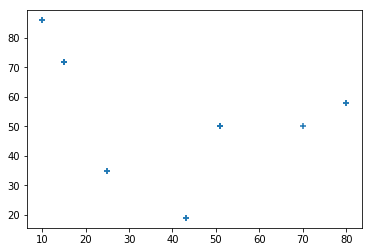

In [139]:
plt.scatter(X,Y, marker='+' )